In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [127]:
# MACD parameters
short_period = 12
long_period  = 26
signal_period = 9
SYM = 'AAPL'

In [128]:
#Collect daily quote (only close value) using yFinance API for last 1yr
df = yf.Ticker('AAPL').history(period='1y')[['Close']]

In [129]:

# Subtract the 26 day EMA from the 12-Day EMA to get the MACD
df['macd'] = df['Close'].ewm(span=12, adjust=False, min_periods=12).mean() -df['Close'].ewm(span=26, adjust=False, min_periods=26).mean()
df

,Close,macd
Date,,
2021-12-10 00:00:00-05:00,178.414520,NaN
2021-12-13 00:00:00-05:00,174.725937,NaN
2021-12-14 00:00:00-05:00,173.324066,NaN
2021-12-15 00:00:00-05:00,178.265381,NaN
2021-12-16 00:00:00-05:00,171.266006,NaN
...,...,...
2022-12-05 00:00:00-05:00,146.630005,0.194705
2022-12-06 00:00:00-05:00,142.910004,-0.157302
2022-12-07 00:00:00-05:00,140.940002,-0.588450


In [130]:
# signal = 9 Day EMA of the MACD 
df['macd_s'] = df['macd'].ewm(span=9, adjust=False, min_periods=9).mean()
df

,Close,macd,macd_s
Date,,,
2021-12-10 00:00:00-05:00,178.414520,NaN,NaN
2021-12-13 00:00:00-05:00,174.725937,NaN,NaN
2021-12-14 00:00:00-05:00,173.324066,NaN,NaN
2021-12-15 00:00:00-05:00,178.265381,NaN,NaN
2021-12-16 00:00:00-05:00,171.266006,NaN,NaN
...,...,...,...
2022-12-05 00:00:00-05:00,146.630005,0.194705,0.278070
2022-12-06 00:00:00-05:00,142.910004,-0.157302,0.190995
2022-12-07 00:00:00-05:00,140.940002,-0.588450,0.035106


In [131]:
# Histogram MACD- signal.
df['hist'] = df['macd']-df['macd_s']
#replace Nan with 0
df.fillna(0,inplace=True) 
df

,Close,macd,macd_s,hist
Date,,,,
2021-12-10 00:00:00-05:00,178.414520,0.000000,0.000000,0.000000
2021-12-13 00:00:00-05:00,174.725937,0.000000,0.000000,0.000000
2021-12-14 00:00:00-05:00,173.324066,0.000000,0.000000,0.000000
2021-12-15 00:00:00-05:00,178.265381,0.000000,0.000000,0.000000
2021-12-16 00:00:00-05:00,171.266006,0.000000,0.000000,0.000000
...,...,...,...,...
2022-12-05 00:00:00-05:00,146.630005,0.194705,0.278070,-0.083364
2022-12-06 00:00:00-05:00,142.910004,-0.157302,0.190995,-0.348297
2022-12-07 00:00:00-05:00,140.940002,-0.588450,0.035106,-0.623556


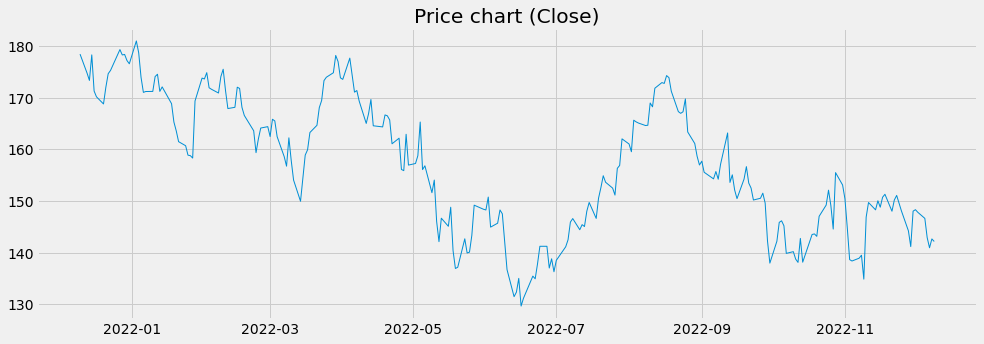

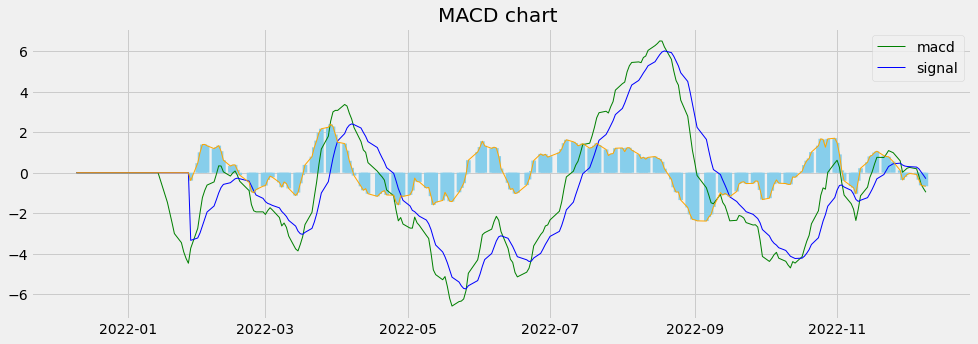

In [134]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] =(20,10)

# plot close price
plt.figure(figsize=(15,5))
plt.plot(df.index, df['Close'], label="close", linewidth=1)
plt.title('Price chart (Close)')
plt.show()

#plot macd, signal and histogram

plt.figure(figsize=(15,5))
plt.title('MACD chart ')
plt.plot(df.index, df['macd'],label="macd", color='green', linewidth=1)
plt.plot(df.index, df['macd_s'], label="signal", color='blue', linewidth=1)
plt.plot(df.index, df['hist'], color='orange', linewidth=1)
plt.bar(df.index, df['hist'], width=2, snap=False, color='skyblue')
plt.legend()
plt.show()
